訓練模型

In [19]:
import pandas as pd
import numpy as np

source_df = pd.read_csv(f"..//Data//PreparedData//L1_Processed_Train.csv")
print(source_df.dtypes)
source_df

Year                 int64
Month                int64
Day                  int64
Hour                 int64
Minute               int64
WindSpeed(m/s)     float64
Pressure(hpa)      float64
Temperature(°C)    float64
Humidity(%)        float64
Sunlight(Lux)      float64
Power(mW)          float64
dtype: object


,Year,Month,Day,Hour,Minute,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,2024,1,1,6,30,0.0,1016.54,17.50,86.78,50.09,0.00
1,2024,1,1,6,40,0.0,1016.59,17.49,86.80,163.25,0.02
2,2024,1,1,6,50,0.0,1016.66,17.50,86.95,326.83,0.05
3,2024,1,1,7,0,0.0,1016.73,17.50,86.99,470.83,0.08
4,2024,1,1,7,10,0.0,1016.77,17.57,86.97,659.67,0.14
...,...,...,...,...,...,...,...,...,...,...,...
10620,2024,7,24,17,40,0.0,961.30,25.22,100.00,91.25,0.00
10621,2024,7,24,17,50,0.0,961.06,24.91,100.00,54.00,0.00
10622,2024,7,24,18,0,0.0,960.91,24.76,100.00,37.25,0.00
10623,2024,7,24,18,10,0.0,959.86,24.97,100.00,40.33,0.00


In [20]:
all_features = source_df.columns.to_list()
all_features

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'WindSpeed(m/s)',
 'Pressure(hpa)',
 'Temperature(°C)',
 'Humidity(%)',
 'Sunlight(Lux)',
 'Power(mW)']

In [30]:
to_predict_features = ['Power(mW)']
y_label = source_df[to_predict_features]

# 不用的特徵
discarded_features = [
    'Year',
    'Month',
    'Day',
    'Hour',
    'Minute',
    'Pressure(hpa)',
    'WindSpeed(m/s)',
    ]

selected_features = [feature for feature in all_features if feature not in discarded_features]
selected_features


['Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']

In [31]:
# 計算缺失數值
missing_counts = source_df.isna().sum()
missing_counts

Year               0
Month              0
Day                0
Hour               0
Minute             0
WindSpeed(m/s)     0
Pressure(hpa)      0
Temperature(°C)    0
Humidity(%)        0
Sunlight(Lux)      0
Power(mW)          0
dtype: int64

                 Power(mW)  Sunlight(Lux)  Humidity(%)  Temperature(°C)  \
Power(mW)         1.000000       0.960093    -0.680356         0.599511   
Sunlight(Lux)     0.960093       1.000000    -0.754963         0.699081   
Humidity(%)      -0.680356      -0.754963     1.000000        -0.820283   
Temperature(°C)   0.599511       0.699081    -0.820283         1.000000   
Pressure(hpa)     0.022156       0.008922     0.020853        -0.106688   
WindSpeed(m/s)    0.183214       0.150349    -0.059393        -0.145924   
Minute           -0.003923      -0.003975    -0.000454         0.000704   
Hour             -0.085132      -0.111646    -0.138392         0.026120   
Day              -0.005213       0.001590     0.031926         0.036005   
Month            -0.007656       0.051749    -0.187483         0.590233   
Year                   NaN            NaN          NaN              NaN   

                 Pressure(hpa)  WindSpeed(m/s)    Minute      Hour       Day  \
Power(mW)          

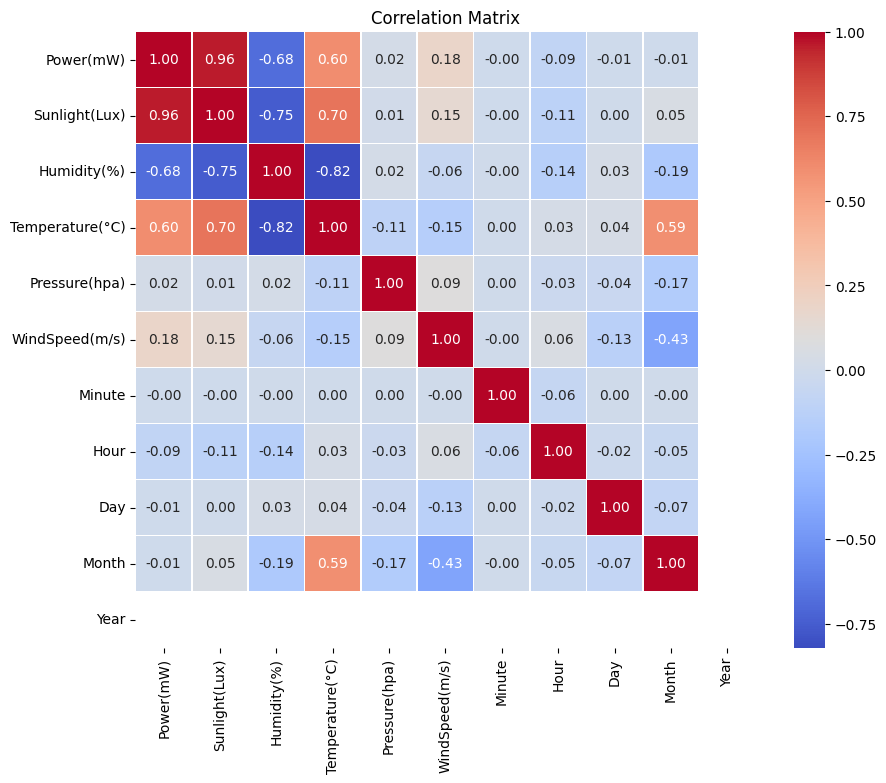

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = source_df.corr().iloc[::-1, ::-1]
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X = source_df[selected_features].drop(columns=to_predict_features)
y = source_df[to_predict_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_log = np.log1p(y_train)
y_train_log

,Power(mW)
6423,2.981633
2568,1.871802
1873,7.388761
8190,0.019803
9924,5.707874
...,...
1617,3.506158
1918,0.182322
5812,0.000000
2102,5.056883


In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled_df

,Temperature(°C),Humidity(%),Sunlight(Lux)
0,-0.858490,1.034173,-0.574286
1,-1.014421,-0.903107,-0.719999
2,0.685433,-1.302747,2.707559
3,-0.421473,1.034173,-0.876110
4,1.617941,-1.490150,0.221325
...,...,...,...
8495,-1.145732,0.669066,-0.444287
8496,-0.576378,0.568186,-0.857076
8497,-0.667680,1.034173,-0.881585
8498,0.177631,-0.466220,0.030235


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_pred = model.predict(X_test_scaled_df)
# y_pred = np.expm1(y_pred_log) # 對數變換
y_pred = np.clip(y_pred, 0, None) # 負數改成0

In [40]:
print("Prediction\n",
      pd.DataFrame(y_pred,columns=y_test.columns))
print("Ture\n",
      pd.DataFrame(y_test,columns=y_test.columns))

Prediction
         Power(mW)
0        0.000000
1       12.208504
2        0.000000
3      124.352764
4      471.825340
...           ...
2120   125.058375
2121  1297.427344
2122     0.000000
2123   324.924459
2124   132.998747

[2125 rows x 1 columns]
Ture
       Power(mW)
8873       0.68
372        8.94
481        8.30
2463      28.46
7333     247.76
...         ...
1517      30.86
5181    1505.18
4987       2.95
5828     276.64
6919      94.61

[2125 rows x 1 columns]


In [46]:
y_pred_df = pd.DataFrame(y_pred, columns=to_predict_features)


array([[  0.        ],
       [ 12.2085045 ],
       [  0.        ],
       ...,
       [  0.        ],
       [324.92445865],
       [132.99874742]])